<a href="https://colab.research.google.com/github/spshreya/python_prac/blob/master/covid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://www.dropbox.com/s/u7k4oih25w6e2k8/8_risk_factors.rar?dl=0

--2020-11-23 12:35:16--  https://www.dropbox.com/s/u7k4oih25w6e2k8/8_risk_factors.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u7k4oih25w6e2k8/8_risk_factors.rar [following]
--2020-11-23 12:35:16--  https://www.dropbox.com/s/raw/u7k4oih25w6e2k8/8_risk_factors.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc641faef8aa14aa8cd9c7ada8b0.dl.dropboxusercontent.com/cd/0/inline/BDtbP7-tfbkalTZdI3SNMcsqjuphuBrR7UvFuiGuVfaOBKj8So81L7Z6BthrXl5XTQVJ-HyTYrtkyYG7_J9ogG0XocZuHmKbfws0ADWyutFVHwSVMNBI2RSw-86dXBg1kxA/file# [following]
--2020-11-23 12:35:16--  https://uc641faef8aa14aa8cd9c7ada8b0.dl.dropboxusercontent.com/cd/0/inline/BDtbP7-tfbkalTZdI3SNMcsqjuphuBrR7UvFuiGuVfaOBKj8So81L7Z6BthrXl5XTQVJ-HyTYrtkyYG7_J9ogG0XocZ

In [7]:
!pip install unrar

In [8]:
!unrar x 8_risk_factors.rar\?dl\=0


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from 8_risk_factors.rar?dl=0


Would you like to replace the existing file 8_risk_factors/Age.csv
 19804 bytes, modified on 2020-11-09 17:18
with a new one
 19804 bytes, modified on 2020-11-09 17:18

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  8_risk_factors/Age.csv                                         4%  OK 
Extracting  8_risk_factors/Asthma.csv                                      5%  OK 
Extracting  8_risk_factors/Autoimmune disorders.csv                        7%  OK 
Extracting  8_risk_factors/Cardio- and cerebrovascular disease.csv         8%  OK 
Extracting  8_risk_factors/Cerebrovascular disease.csv                    11%  OK 
Extracting  8_risk_factors/Chronic digestive disorders.csv                13%  OK 
Extracting  8_risk_factors/Chronic kidney disease.csv                     19%  OK 
Extracting  8_risk_factors/

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow 
import cv2

In [42]:
pth= '8_risk_factors/'
categories= ['Asthma.csv','Autoimmune disorders.csv','Cardio- and cerebrovascular disease.csv','Cerebrovascular disease.csv','Chronic digestive disorders.csv','Chronic kidney disease.csv','Chronic respiratory diseases.csv','COPD.csv',
             'Dementia.csv','Diabetes.csv','Endocrine diseases.csv','Heart Disease.csv','Hypertension.csv','Immune system disorders.csv','Neurological disorders.csv','Respiratory system diseases.csv']
lsty=[]
lstn=[]
for i in categories:
  path= os.path.join(pth, i)
  dataf= pd.read_csv(path)
  y=0
  n=0
  for i in dataf['Critical only']:
    if i =='Y':
      y+=1
    else:
      n+=1
  lsty.append(y)
  lstn.append(n)

print(lsty)
print(lstn)

[6, 2, 2, 9, 1, 24, 19, 20, 4, 41, 0, 40, 43, 4, 5, 1]
[5, 3, 8, 24, 6, 36, 28, 33, 7, 59, 4, 60, 57, 3, 2, 7]


In [43]:
catt = ' '.join(categories)
catt=catt.split('.csv')
catt=catt[:-1]

In [44]:
df1=pd.DataFrame({'Yes':lsty,'No':lstn,'Disease':catt})

In [45]:
df1

,Yes,No,Disease
0,6,5,Asthma
1,2,3,Autoimmune disorders
2,2,8,Cardio- and cerebrovascular disease
3,9,24,Cerebrovascular disease
4,1,6,Chronic digestive disorders
5,24,36,Chronic kidney disease
6,19,28,Chronic respiratory diseases
7,20,33,COPD
8,4,7,Dementia
9,41,59,Diabetes


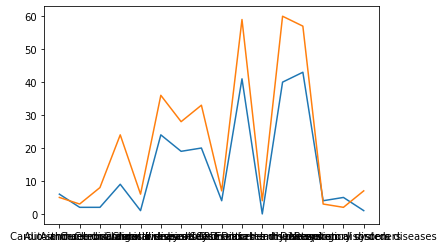

In [48]:
yes=df1.loc[:, 'Yes']
no=df1.loc[:,'No']
dis=df1.loc[:,'Disease']
plt.plot(dis,yes)
plt.plot(dis,no)